In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv
import matplotlib.pyplot as plt 

In [2]:
data = np.load('Preprocessed_data.npy',allow_pickle = True)

In [3]:
data

array([['D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_03_15_897.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_11_09_50_454.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_11_05_42_500.jpg',
        ...,
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\left_2022_03_13_11_09_27_023.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_05_32_273.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\left_2022_03_13_11_03_09_749.jpg'],
       ['-0.2', '0.0', '0.0', ..., '0.2', '-0.2', '0.2']], dtype='<U102')

In [4]:
imgs = data[0]
steering = data[1]

In [5]:
imgs

array(['D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_03_15_897.jpg',
       'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_11_09_50_454.jpg',
       'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_11_05_42_500.jpg',
       ...,
       'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\left_2022_03_13_11_09_27_023.jpg',
       'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_05_32_273.jpg',
       'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\left_2022_03_13_11_03_09_749.jpg'],
      dtype='<U102')

In [6]:
steering

array(['-0.2', '0.0', '0.0', ..., '0.2', '-0.2', '0.2'], dtype='<U102')

In [7]:
len(data)

2

## Image Processing

In [8]:
imgs[0]

'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_03_15_897.jpg'

In [9]:
img = cv.imread(imgs[0])

In [10]:
img.shape

(160, 320, 3)

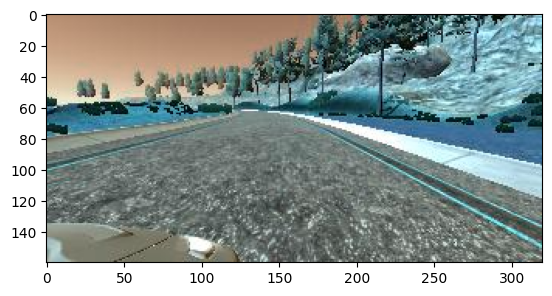

In [11]:
plt.imshow(img)

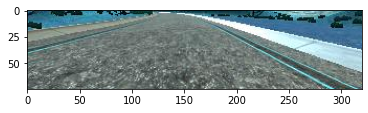

In [12]:
plt.imshow(img[60:135,:,:])

In [13]:
#function for cropping
def crop_img(img):
    crop = img[60:135,:,:]
    return crop

#creating a fuction for yuv conversion
def bgr2yuv(crop):
    yuv = cv.cvtColor(crop, cv.COLOR_BGR2YUV)
    return yuv

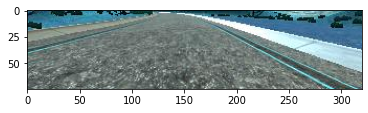

In [15]:
#cropping the image
crop = crop_img(img)
plt.imshow(crop)

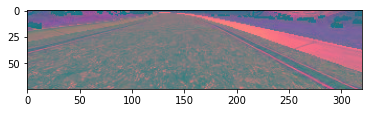

In [16]:
#converting the image
yuv = bgr2yuv(crop)
plt.imshow(yuv)

## Image Augmentation

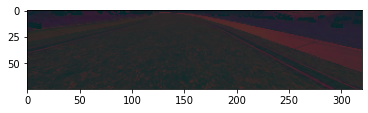

In [18]:
#taking the yuv image for brigtness control
brigtness_cont = np.random.randint(1,4)

plt.imshow(( yuv/ brigtness_cont).astype(np.uint8))

-0.2

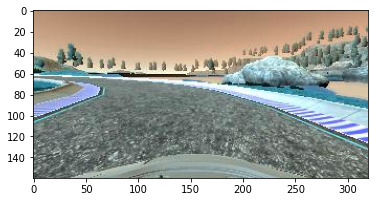

In [19]:
#Brightness
img = cv.imread('D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_11_13_02_305.jpg')

plt.imshow(img)
float(steering[0])

0.2

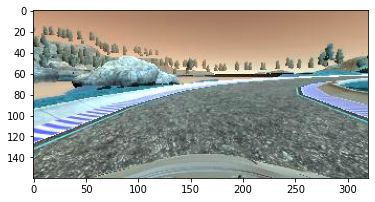

In [20]:
flip = cv.flip(img,1)
plt.imshow(flip)
#since we have fliped the image we also need to
#change the steering angle to opposite 
#to get it adjusted to the image
-float(steering[0])

## Batch Generator fuction
combining all the above function in one for multiple images

In [21]:
#Now combining the brigtness control and
#image fliping in one function
#this function of augmentation is also going to
#be a batch generator

def batch_generator(imgs,steering,batch_size):
    
    #infinite loop
    while True:
        
        X=[]
        y=[]
        
        #running the whole process for each batch of images
        for i in range(batch_size):
        
            #getting random image index from imgs
            index = np.random.randint(0,len(imgs)-1)
            #passing and reading the random image index
            img = cv.imread(imgs[index])

            #cropping image as discussed above
            img = img[60:135,:,:]
            #or img = crop_img(img)
            
            #converting the image to yuv as discussed above
            img = cv.cvtColor(crop, cv.COLOR_BGR2YUV)
            #or img = bgr2yuv(img)
            
            #instead of going for each image brigntness control
            #we will go for only random images
            if (np.random.rand()>0.5):
                #brightness control
                brigtness_cont = np.random.randint(1,4)
                img = (img/ brigtness_cont).astype(np.uint8)

            #similarly for fliping the image
            if (np.random.rand()>0.5):
                #image fliping
                img = cv.flip(img,1)
                steering_angle = -float(steering[index])
            else:
                steering_angle = float(steering[index])

            X.append(img)
            y.append(steering_angle)
        
        #converting the image 
        # and steering_angle processed into the numpy array
        X = np.array(X)
        y = np.array(y)
        
        
        #Yield is a keyword in Python that is used to return from a function 
        #without destroying the states of its local variable and
        #when the function is called, the execution starts from the last yield statement. 
        #Any function that contains a yield keyword is termed a generator. 
        #Hence, yield is what makes a generator. 
        yield X,y